<a href="https://colab.research.google.com/github/nuurceng/vehicle_classification/blob/main/Resnet50_1_vehicle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# for data processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os


# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

#deep learning libraries

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
#print('version of tensorflow',tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

In [ ]:
link="/content/drive/MyDrive/vehicle_classification/Vehicle_classification/"
t =os.listdir('/content/drive/MyDrive/vehicle_classification/Vehicle_classification/train/')
print(t)
v=os.listdir('/content/drive/MyDrive/vehicle_classification/Vehicle_classification/valid/')
print(v)

['Truck', 'Car']
['Truck', 'Car']


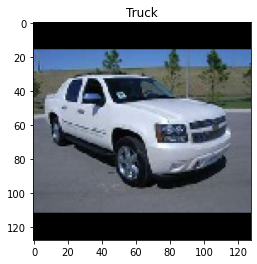

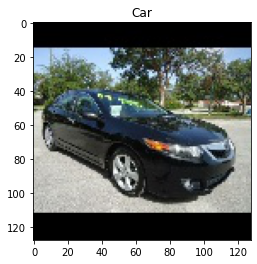

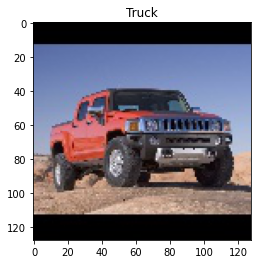

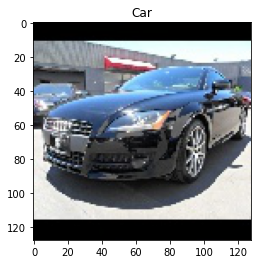

In [ ]:
for x in ['/content/drive/MyDrive/vehicle_classification/Vehicle_classification/train/','/content/drive/MyDrive/vehicle_classification/Vehicle_classification/valid/']:
  for l in ['Truck/','Car/']:
    for ll in os.listdir(x+l):
      link=x+l+ll
      img=mpimg.imread(link)
      plt.title(l[:-1])
      plt.imshow(img)
      plt.show()
      break
    

In [ ]:
x='/content/drive/MyDrive/vehicle_classification/Vehicle_classification/train/'
arr=[]
df=[]
for l in ['Truck/','Car/']:
  for ll in os.listdir(x+l):
    link=x+l+ll
    img=mpimg.imread(link)
    if l== 'Truck/':
      arr.append(int(1))
    else :
      arr.append(int(0))
    img=resize(img,(64,64),anti_aliasing=True)  # resizes the images in 64x64 shape
    img=img.reshape(4096*3)    # flattens the image to append in the array
    df.append(img)
df=pd.DataFrame(df)
arr=pd.DataFrame({'label':arr})     

df=pd.concat([arr,df],axis=1)      # creates the final dataframe
df.head()

,label,0,1,2,3,4,5,6,7,8,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.001961,0.0,0.0,0.001961,0.0,0.0,0.001961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train=df

In [ ]:
x='/content/drive/MyDrive/vehicle_classification/Vehicle_classification/valid/'
arr=[]
df=[]
for l in ['Truck/','Car/']:
  for ll in os.listdir(x+l):
    link=x+l+ll
    img=mpimg.imread(link)
    if l== 'Truck/':
      arr.append(int(1))
    else :
      arr.append(int(0))
    img=resize(img,(64,64),anti_aliasing=True)
    img=img.reshape(4096*3)
    df.append(img)
df=pd.DataFrame(df)
arr=pd.DataFrame({'label':arr})

df=pd.concat([arr,df],axis=1)
df.head()

,label,0,1,2,3,4,5,6,7,8,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,1,0.0,0.0,0.001961,0.0,0.0,0.001961,0.0,0.0,0.001961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test=df

In [ ]:
print(train.shape)

print(test.shape)

X_train=train.drop('label',axis=1)
y_train=train['label']

X_test=test.drop('label',axis=1)
y_test=test['label']

X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,random_state=0,test_size=0.5,stratify=y_test)    

# splits the dataframe into test and validation for checking overfitting/ underfitting nature of model

print(X_test.shape,X_val.shape,y_test.shape,y_val.shape)

print()
a=y_train.value_counts()
print(a)

print()
b=y_val.value_counts()
print(b)

print()
c=y_test.value_counts()
print(c)


X_train=X_train.to_numpy()
X_val=X_val.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()
y_test=y_test.to_numpy()


X_train=X_train.reshape(5117,64,64,3)
X_val=X_val.reshape(2526,64,64,3)
X_test=X_test.reshape(2525,64,64,3)   # changing them into 4d to feed into the model.
y_train=y_train.reshape(5117,1)
y_val=y_val.reshape(2526,1)
y_test=y_test.reshape(2525,1)
print()
print ("son eğitim örnekleri sayısı = " + str(X_train.shape[0]))
print ("test örnekleri sayısı = " + str(X_test.shape[0]))
print ("X_train şekli:" + str(X_train.shape))
print ("Y_train şekli:" + str(y_train.shape))
print ("X_test şekli: " + str(X_test.shape))
print ("Y_test şekli: " + str(y_test.shape))

print("X_val shape" + str(X_val.shape))
print("Y_val shape" + str(y_val.shape))

(5117, 12289)
(5051, 12289)
(2525, 12288) (2526, 12288) (2525,) (2526,)

0    2961
1    2156
Name: label, dtype: int64

0    1461
1    1065
Name: label, dtype: int64

0    1461
1    1064
Name: label, dtype: int64

son eğitim örnekleri sayısı = 5117
test örnekleri sayısı = 2525
X_train şekli:(5117, 64, 64, 3)
Y_train şekli:(5117, 1)
X_test şekli: (2525, 64, 64, 3)
Y_test şekli: (2525, 1)
X_val shape(2526, 64, 64, 3)
Y_val shape(2526, 1)


In [ ]:
from keras.models import load_model,Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint ,EarlyStopping

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPool2D, Dropout, Dense
from keras import layers
from keras import applications
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow import keras

img_height,img_width = 64,64

# İmagenet ağırlıkları yükleniyorsa,input statik bir kare şekle sahip olmalıdır ((128, 128), (160, 160), (192, 192) veya (224, 224))
base_model = ResNet50(weights='imagenet', include_top=False, input_shape= (img_height,img_width,3))
for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)#ekstra katmanlar
x = layers.Dropout(0.5)(x)#aşırı uymaktan kaçınmak için
predictions =layers.Dense(1, activation= 'sigmoid')(x)#
model = keras.models.Model(inputs = base_model.input, outputs = predictions)
# inputs=base_model.input, girdi katmanını seçer, outputs=predictions ise yukarıda oluşturduğumuz yoğun katman.

#sgd = SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)#
adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
model.summary()
 

train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min' ,verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/vehicle_classification/checkpoint_rsnt50-1.h5', monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max') #bu, en iyi dönemi kurtaran işlevdir
 
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.000001) #başka bir aşırı uyum önlemi
                              
callbacks_list = [checkpoint, reduce_lr]#, early_stopping
 
epochs=40
batch_size=32
#history=model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(X_val,y_val), callbacks= callbacks_list)
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              validation_steps=(X_val.shape[0] // batch_size),
                              callbacks=[callbacks_list])
 
model.save('/content/drive/MyDrive/vehicle_classification/resnet50-1.h5')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


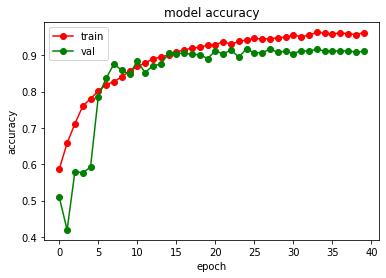

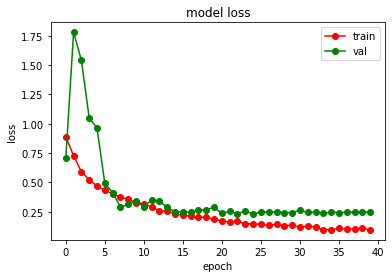

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'],'ro-')
plt.plot(history.history['val_accuracy'], 'go-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('/content/drive/MyDrive/vehicle_classification/sonuc/acc_rsnt50-1.png',dpi=300)
plt.show()

plt.plot(history.history['loss'],'ro-')
plt.plot(history.history['val_loss'], 'go-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('/content/drive/MyDrive/vehicle_classification/sonuc/loss_rsnt50-1.png',dpi=300)
plt.show()

In [ ]:
scores=model.evaluate(X_test,y_test)
print("Test başarı oran:%{:.2f}".format(scores[1]*100))

scores=model.evaluate(X_val,y_val)
print("Validation başarı oran:%{:.2f}".format(scores[1]*100))

79/79 [==============================] - 2s 22ms/step - loss: 0.2622 - accuracy: 0.9050
Test başarı oran:%90.50
79/79 [==============================] - 2s 19ms/step - loss: 0.2474 - accuracy: 0.9113
Validation başarı oran:%91.13


79/79 [==============================] - 1s 17ms/step
[0.00354094]
<class 'numpy.ndarray'>
test data accuracy :  0.904950495049505


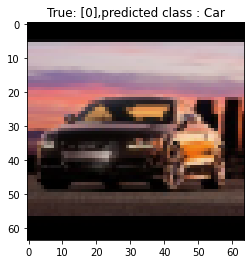

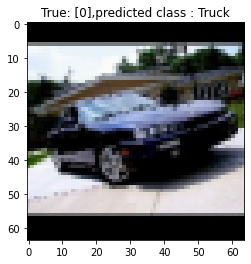

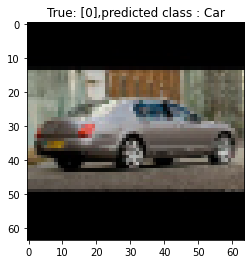

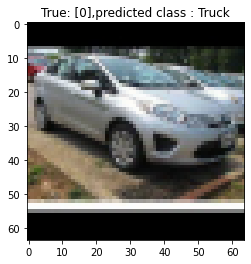

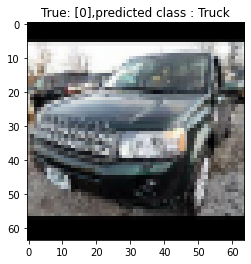

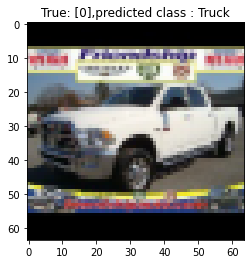

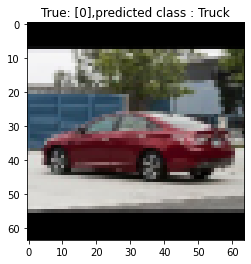

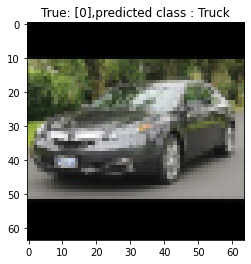

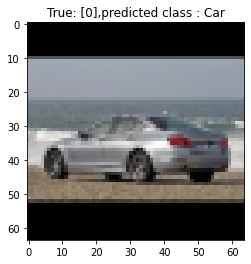

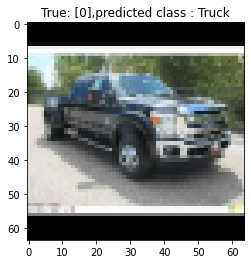

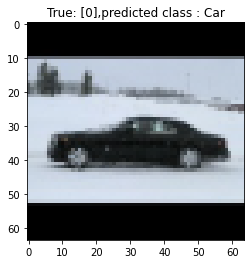

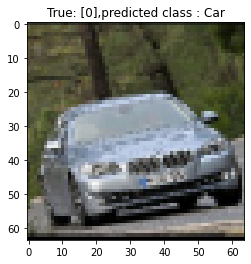

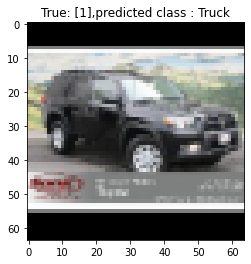

In [ ]:
y_pred=model.predict(X_test)
for i in y_pred:
  print(i)
  print(type(i))
  break

pred=[]
for i in y_pred:
  if i>=0.5:
    pred.append(int(1))
  else:
    pred.append(int(0))

print('test data accuracy : ',accuracy_score(y_test,pred))


dec=['Car','Truck']

for i in range(13):
  plt.title(f"True: {y_test[i]},predicted class : {dec[pred[i*200]]}")
 

  plt.imshow(X_test[i*200].reshape(64,64,3))
  plt.show()


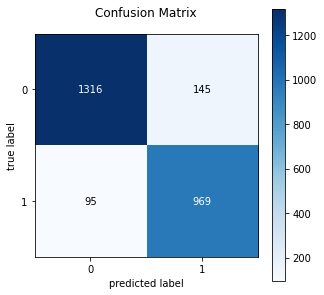

In [ ]:
train_mat=confusion_matrix(y_test, pred)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)

plt.title('Confusion Matrix')
plt.savefig('/content/drive/MyDrive/vehicle_classification/sonuc/cm_rsnt50-1.png',dpi=300)


In [ ]:
from sklearn.metrics import classification_report

labels = ['0-Car', '1-Truck']
cr = "\n\nSINIFLANDIRMA RAPORU\n---------------------\n"
print(classification_report(y_test,pred, target_names=labels))


              precision    recall  f1-score   support

       0-Car       0.93      0.90      0.92      1461
     1-Truck       0.87      0.91      0.89      1064

    accuracy                           0.90      2525
   macro avg       0.90      0.91      0.90      2525
weighted avg       0.91      0.90      0.91      2525



In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/vehicle_classification/resnet50-1.h5")
scores=model.evaluate(X_test,y_test)
print("Test başarı oran:%{:.2f}".format(scores[1]*100))

scores=model.evaluate(X_val,y_val)
print("Validation başarı oran:%{:.2f}".format(scores[1]*100))

79/79 [==============================] - 2s 20ms/step - loss: 0.2622 - accuracy: 0.9050
Test başarı oran:%90.50
79/79 [==============================] - 1s 18ms/step - loss: 0.2474 - accuracy: 0.9113
Validation başarı oran:%91.13
